# Importing dependencies

In [1]:
from time import process_time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Data Pre-Processing

In [2]:
#loading database
california_data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
california_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#checking for null records
california_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
#dropping records with null values as their count is small
california_data = california_data.dropna(how = 'any', axis = 0)
california_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


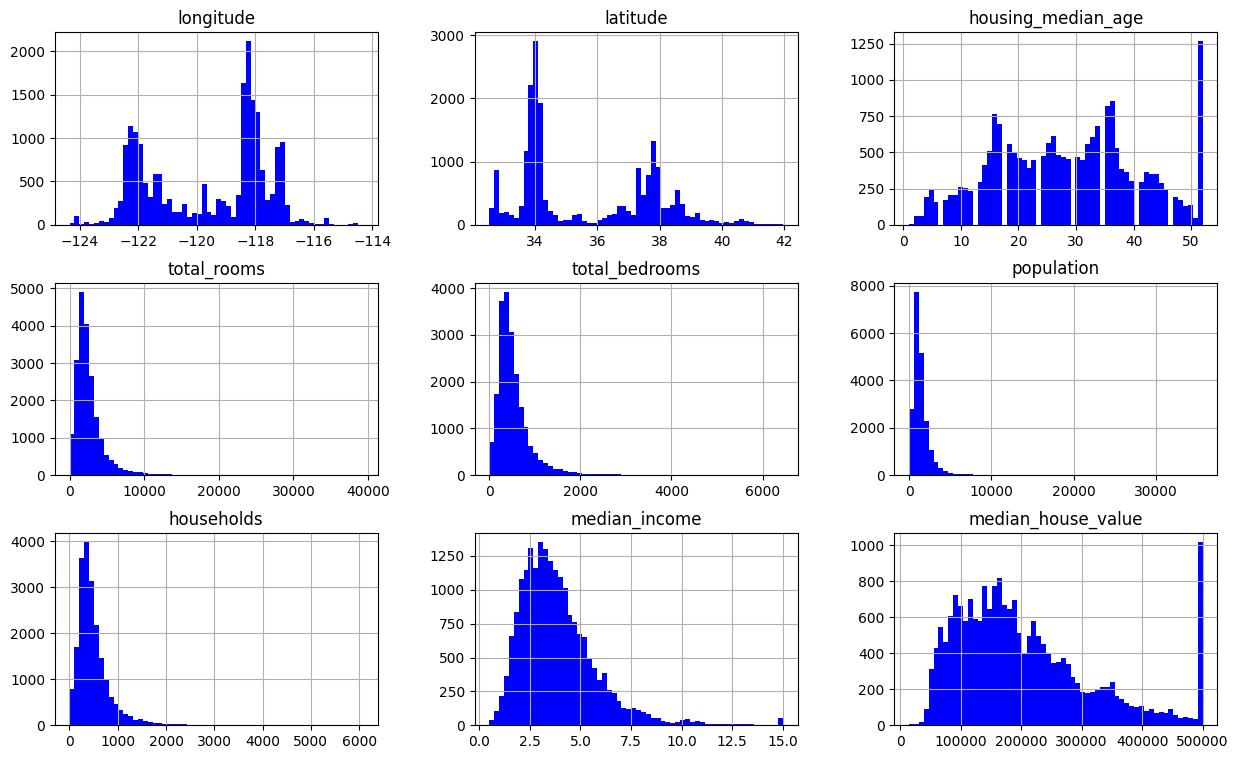

In [6]:
#visualizing dataset
california_data.hist(bins=60, figsize=(15,9),color='b')
plt.show()

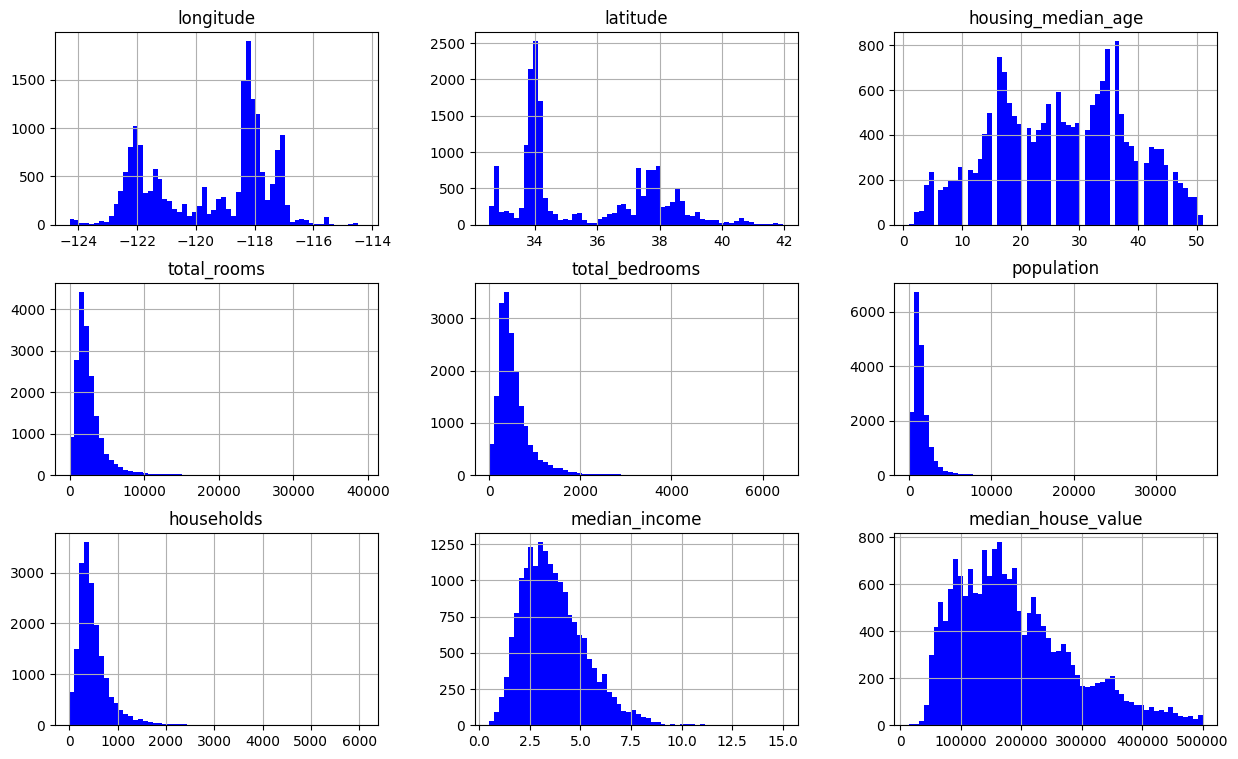

In [7]:
#from histogram, we can clearly see outliers in housing_median_age and median_house_value
#they are likely to be values that were out of range, so we will drop them

max1 = california_data['housing_median_age'].max()
max2 = california_data['median_house_value'].max()
california_data = california_data[(california_data['housing_median_age'] != max1) & (california_data['median_house_value'] != max2)]
california_data.hist(bins=60, figsize=(15,9),color='b')
plt.show()

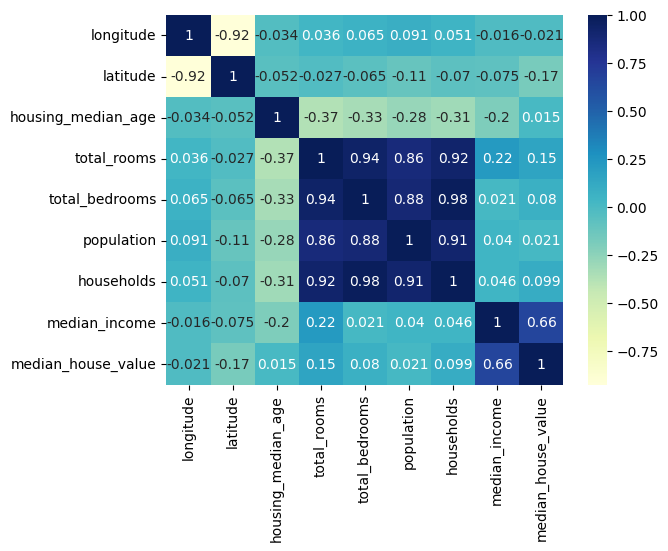

In [8]:
#plotting correlation heatmap
sns.heatmap(california_data.corr(numeric_only = True), cmap = "YlGnBu", annot = True)
plt.show()

In [9]:
#combining longitutde and latitude into diagonal
california_data['diagonal'] = california_data['longitude'] + california_data['latitude']
california_data = california_data = california_data.drop(columns = ['longitude','latitude'])
california_data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,diagonal
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-84.35
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-84.36
8,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-84.42
15,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,-84.41
18,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,-84.42


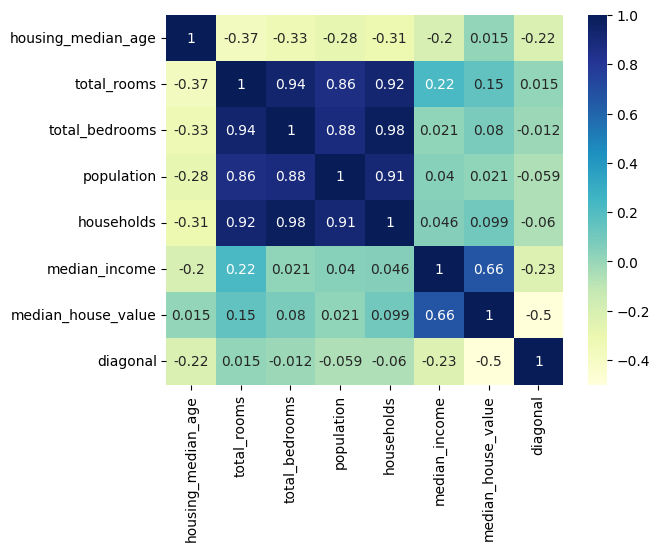

In [10]:
#new heatmap
sns.heatmap(california_data.corr(numeric_only = True), cmap = "YlGnBu", annot = True)
plt.show()

In [11]:
#dropping ocean_proximity column
california_data = california_data.drop(columns = ['ocean_proximity'])
california_data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,diagonal
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-84.35
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,-84.36
8,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,-84.42
15,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,-84.41
18,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,-84.42


In [12]:
#choosing target variable and parameters and splitting into train and test subsets
X = california_data.drop(columns = ['median_house_value'])
y = california_data.median_house_value
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 20)

#convert to np arrays
X_train = np.array(X_train).reshape(-1,7)
X_test = np.array(X_test).reshape(-1,7)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [13]:
#feature and target scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
y_train = scale.fit_transform(y_train)
y_test = scale.fit_transform(y_test)

In [14]:
#uniform initialization of weights and biases
rng = np.random.default_rng()

m = X_train.shape[0] #no. of training values
m_test = X_test.shape[0] #no. of test values
n = X_train.shape[1] #no. of features
w = rng.uniform(-1,1,(n,)).reshape((n,1))
b = np.random.uniform(-1,1)
alpha = 0.5 #learning rate
max_iter = 150

# Implementation

**Part 1: Pure Python Implementation**

In [15]:
#converting input to lists
list_X = list(X_train)
list_y = list(y_train)
list_w = list(w)
list_b = [b]*m

In [16]:
#dot product helper function
def dot(a,b):
    s = 0
    for i in range(n):
        s += a[i]*b[i]
    return s

#sum helper function
def summ(a,b):
    l = []
    for i in range(len(a)):
        l.append(a[i] + b[i])
    return l

#scalar multiplication helper function
def mult(a,x):
    l = []
    for i in range(len(a)):
        l.append(x*a[i])
    return l

#matrix multiplication helper function
def m_mult(a,b):
    l = []
    for i in range(m):
        l.append(dot(a[i],b))
    return l

In [17]:
#cost function
def cost(y_pred,y_actual):
    s = 0
    for i in range(m):
        s += (y_pred[i] - y_actual[i])**2
    return s/(2*m)
    
#calculating grad_w and grad_b
def calc_grad_p1(X,y_pred,y_actual):
    grad_w = []
    grad_b = []
    s2 = 0
    for i in range(n):
        s1 = 0
        for j in range(m):
            if i == 0:
                s2 += (y_pred[j] - y_actual[j])
            s1 += X[j][i]*(y_pred[j] - y_actual[j])
        grad_w.append(s1)
    grad_w = mult(grad_w,1/m)
    grad_b.append(s2/m)
    grad_b = grad_b*m
    return grad_w,grad_b

#gradient descent
def grad_descent_p1(X,y_actual,w_in,b_in,alpha,max_iter):
    w = w_in
    b = b_in
    cost_history = []
    for i in range(max_iter):
        grad_w = []
        grad_b = []
        
        #making prediction
        y_pred = summ(m_mult(X,w),b) 
        
        cost_history.append(cost(y_pred,y_actual))
        
        #calculating gradient
        grad_w, grad_b = calc_grad_p1(X,y_pred,y_actual) 
        
        #updating weights and bias 
        w = summ(w,mult(grad_w,-1*alpha)) 
        b = summ(b,mult(grad_b,-1*alpha))
    
    return w,b[0],cost_history

In [38]:
#get weights and biases from model and measure time taken

start_p1 = process_time()
w_p1, b_p1, cost_history_p1 = grad_descent_p1(list_X,list_y,list_w,list_b,alpha,max_iter)
end_p1 = process_time()
time_p1 = end_p1 - start_p1

In [41]:
#evaluation results
y_train_pred_p1 = X_train.dot(w_p1) + b_p1
y_test_pred_p1 = X_test.dot(w_p1) + b_p1

#scale target back to orignal scale for MAE and RMSE
MAE_train_p1 = mean_absolute_error(scale.inverse_transform(y_train), scale.inverse_transform(y_train_pred_p1))
MAE_test_p1 = mean_absolute_error(scale.inverse_transform(y_test), scale.inverse_transform(y_test_pred_p1))
RMSE_train_p1 = mean_squared_error(scale.inverse_transform(y_train), scale.inverse_transform(y_train_pred_p1), squared=False)
RMSE_test_p1 = mean_squared_error(scale.inverse_transform(y_test), scale.inverse_transform(y_test_pred_p1), squared=False)
r2_score_train_p1 = r2_score(y_train, y_train_pred_p1)
r2_score_test_p1 = r2_score(y_test, y_test_pred_p1)

[MAE_train_p1, MAE_test_p1, RMSE_train_p1, RMSE_test_p1, r2_score_train_p1, r2_score_test_p1]

[44711.90007560386,
 44154.22826556901,
 60469.064052967515,
 59297.830679581915,
 0.601622112640395,
 0.6169051248206713]

**Part-2: Optimized Numpy Implementation**

In [20]:
#cost function will be same as p1

#optimized gradient calculation
def calc_grad_p2(X,y_pred,y_actual):
    m,n = X.shape
    grad_w = np.zeros((n,1))
    grad_b = 0.0
    for i in range(m):
        err = y_pred[i] - y_actual[i]
        for j in range(n):
            grad_w[j] = grad_w[j] + err*X[i,j]
        grad_b = grad_b + err
    grad_w = grad_w/m
    grad_b = grad_b/m
    return grad_w, grad_b

#optimized gradient descent
def grad_descent_p2(X,y_actual,w_in,b_in,alpha,max_iter):
    cost_history = []
    w = w_in
    b = b_in
    for i in range(max_iter):
        #making prediction
        y_pred = np.dot(X,w) + b
        
        #appending cost after iteration
        cost_history.append(cost(y_pred,y_actual))
        
        #calculating gradients
        grad_w, grad_b = calc_grad_p2(X, y_pred, y_actual)
        
        #updating params
        w = w - alpha*grad_w
        b = b - alpha*grad_b
    return w, b, cost_history

In [40]:
#get weights and biases from model and measure time taken

start_p2 = process_time()
w_p2, b_p2, cost_history_p2 = grad_descent_p2(X_train, y_train, w, b, alpha, max_iter)
end_p2 = process_time()
time_p2 = end_p2 - start_p2

In [42]:
#evaluation results
y_train_pred_p2 = X_train.dot(w_p2) + b_p2
y_test_pred_p2 = X_test.dot(w_p2) + b_p2

#scale target back to orignal scale for MAE and RMSE
MAE_train_p2 = mean_absolute_error(scale.inverse_transform(y_train), scale.inverse_transform(y_train_pred_p2))
MAE_test_p2 = mean_absolute_error(scale.inverse_transform(y_test), scale.inverse_transform(y_test_pred_p2))
RMSE_train_p2 = mean_squared_error(scale.inverse_transform(y_train), scale.inverse_transform(y_train_pred_p2), squared=False)
RMSE_test_p2 = mean_squared_error(scale.inverse_transform(y_test), scale.inverse_transform(y_test_pred_p2), squared=False)
r2_score_train_p2 = r2_score(y_train, y_train_pred_p2)
r2_score_test_p2 = r2_score(y_test, y_test_pred_p2)

[MAE_train_p2, MAE_test_p2, RMSE_train_p2, RMSE_test_p2, r2_score_train_p2, r2_score_test_p2]

[44711.90007560386,
 44154.22826556901,
 60469.064052967515,
 59297.830679581915,
 0.601622112640395,
 0.6169051248206713]

**Part-3: Scikit-learn Implementation**

In [43]:
#initialize model
model_p3 = LinearRegression()

#train with training dataset and measure fitting duration
start_p3 = process_time()
model_p3.fit(X_train, y_train)
end_p3 = process_time()
time_p3 = end_p3 - start_p3


In [44]:
#evaluation results
y_train_pred_p3 = model_p3.predict(X_train)
y_test_pred_p3 = model_p3.predict(X_test)

#scale target back to orignal scale for MAE and RMSE
MAE_train_p3 = mean_absolute_error(scale.inverse_transform(y_train), scale.inverse_transform(y_train_pred_p3))
MAE_test_p3 = mean_absolute_error(scale.inverse_transform(y_test), scale.inverse_transform(y_test_pred_p3))
RMSE_train_p3 = mean_squared_error(scale.inverse_transform(y_train), scale.inverse_transform(y_train_pred_p3), squared=False)
RMSE_test_p3 = mean_squared_error(scale.inverse_transform(y_test), scale.inverse_transform(y_test_pred_p3), squared=False)
r2_score_train_p3 = r2_score(y_train, y_train_pred_p3)
r2_score_test_p3 = r2_score(y_test, y_test_pred_p3)

[MAE_train_p3, MAE_test_p3, RMSE_train_p3, RMSE_test_p3, r2_score_train_p3, r2_score_test_p3]

[44708.261733558975,
 44134.80594403355,
 60452.101241511584,
 59249.83555552526,
 0.601845587611388,
 0.6175250208553476]

# Evaluation

**1. Convergence Time**

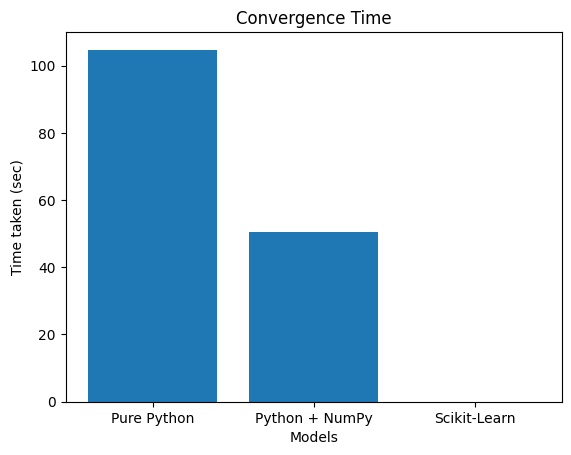

In [45]:
models = ['Pure Python', 'Python + NumPy', 'Scikit-Learn']
times = [time_p1,time_p2,time_p3]
#plotting bar chart
plt.bar(models,times)
plt.title('Convergence Time')
plt.xlabel('Models')
plt.ylabel('Time taken (sec)')
plt.show()

In [46]:
time_p3

0.009147806999976638

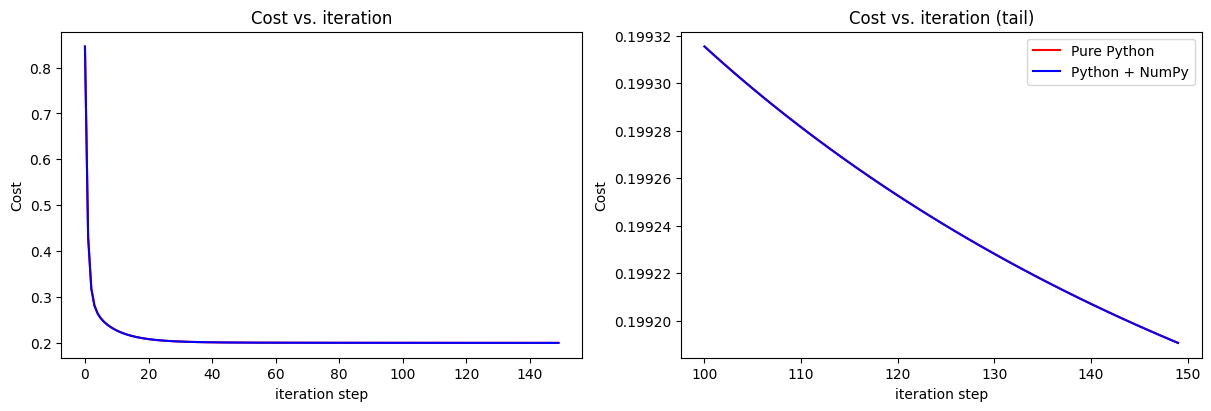

In [47]:
#cost history over iterations
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history_p1, c = 'r', label = 'Pure Python'); ax1.plot(cost_history_p2, c = 'b', label = 'Python + NumPy')
ax2.plot(100 + np.arange(len(cost_history_p1[100:])), cost_history_p1[100:], c = 'r', label = 'Pure Python'); ax2.plot(100 + np.arange(len(cost_history_p2[100:])), cost_history_p2[100:], c = 'b', label = 'Python + NumPy')
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.legend()
plt.show()

**2. Performance Metrics**

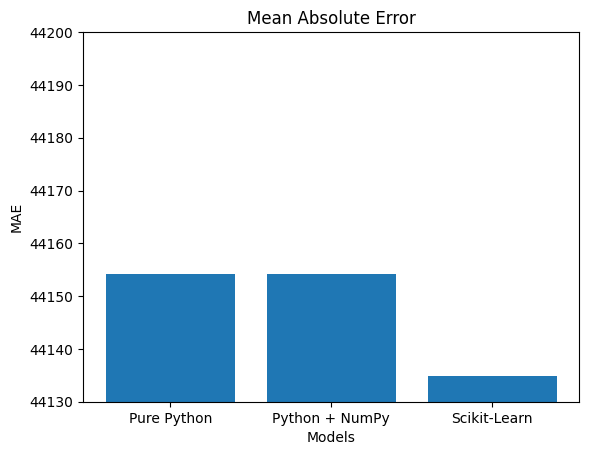

In [48]:
#MAE over test set
MAE_tests = [MAE_test_p1, MAE_test_p2, MAE_test_p3]

plt.bar(models, MAE_tests)
plt.title('Mean Absolute Error')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.ylim(44130,44200)
plt.show()

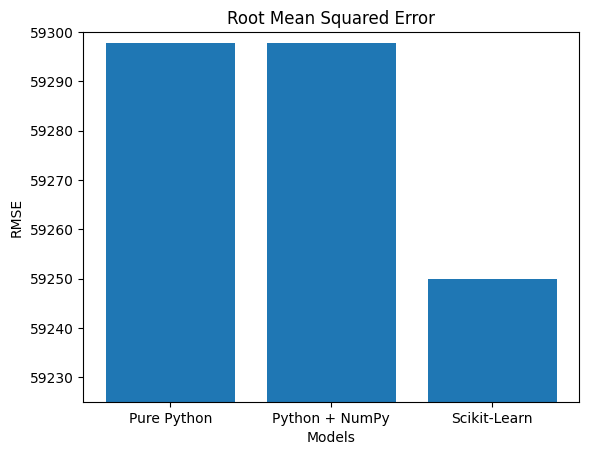

In [51]:
#RMSE over test set
RMSE_tests = [RMSE_test_p1, RMSE_test_p2, RMSE_test_p3]

plt.bar(models, RMSE_tests)
plt.title('Root Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(59225,59300)
plt.show()

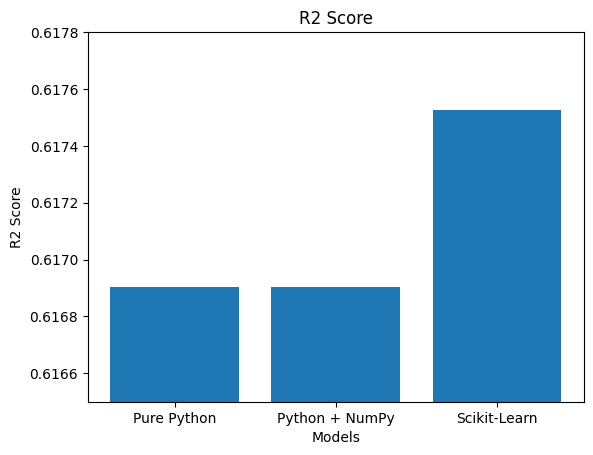

In [52]:
#r2 score over tests
r2_score_tests = [r2_score_test_p1, r2_score_test_p2, r2_score_test_p3]

plt.bar(models,r2_score_tests)
plt.title('R2 Score')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.ylim(0.61650, 0.61780)
plt.show()